In [ ]:
#https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
#predicting if news is fake (0) or real (1) based on text using Machine Learning Algorithms
#Random Forest Classifier
#Gaussian Naive Bayes
#Bernoulli Naive Bayes
#Logistic Regression
#XGBoost Classifier

In [238]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt 
import string
import re
import warnings
warnings.filterwarnings('ignore')

In [239]:
fake = pd.read_csv('./Kaggle/fake_true_news/Fake.csv')
true = pd.read_csv('./Kaggle/fake_true_news/True.csv')

In [240]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [241]:
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [242]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [243]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [244]:
fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

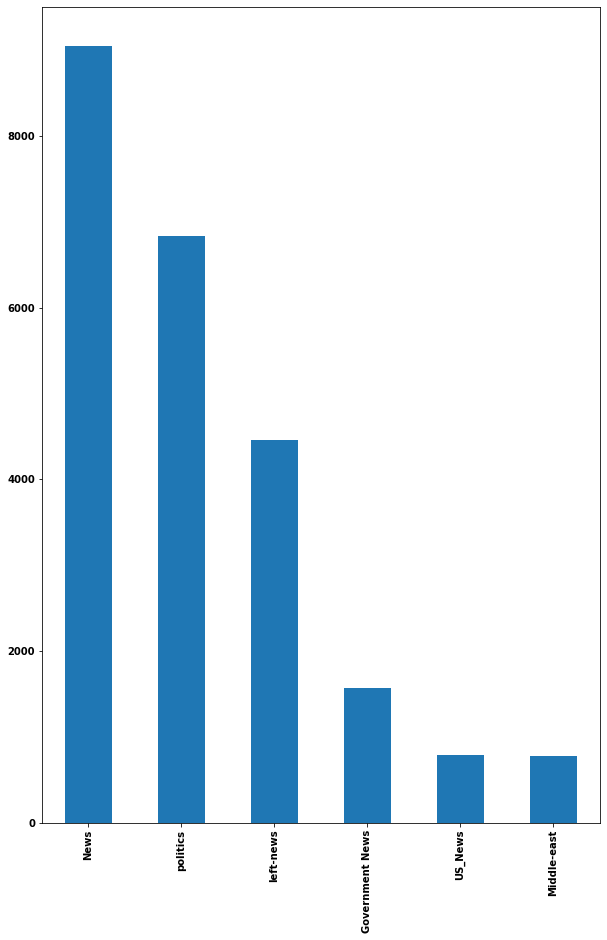

In [245]:
fake['subject'].value_counts().plot(kind='bar', figsize=(10,15))


In [246]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [247]:
#some text is in date column, dropping the rows
fake = fake.drop(columns = ['date'])

In [248]:
true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

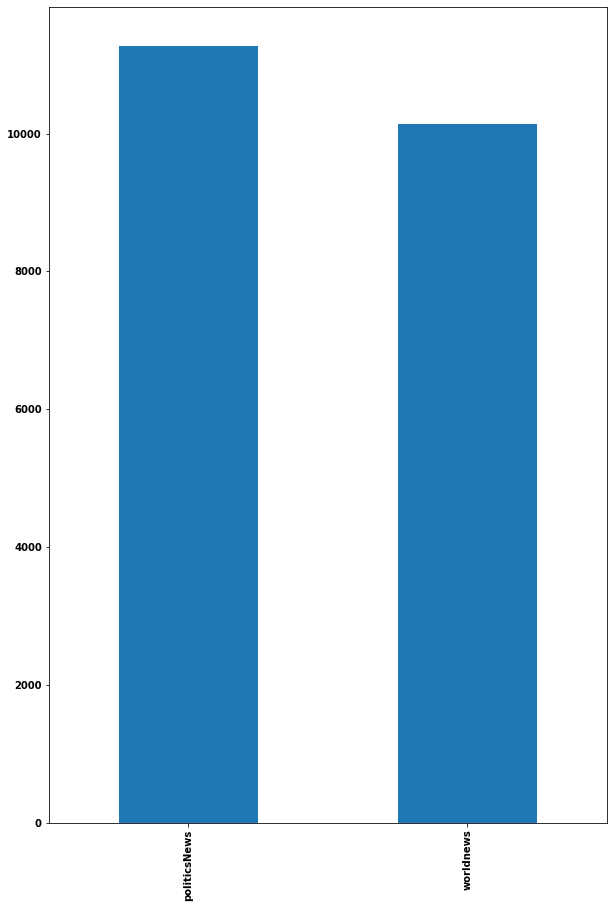

In [249]:
true['subject'].value_counts().plot(kind='bar', figsize=(10,15))

In [250]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [251]:
true = true.drop(columns = ['date'])

In [252]:
true.head(5)

,title,text,subject
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews


# Cleaning Strings

In [253]:
fake.head(5)

,title,text,subject
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News


In [254]:
#cleaning fake dataset title column
titles_fake = []
lowered_fake = []
for i in fake.title:
    
    titles_fake.append(re.sub(r'[^\w\s]','',i))

for i in titles_fake:
    lowered_fake.append(i.lower())

In [255]:
len(lowered_fake)

23481

In [256]:
fake['title'] = lowered_fake

In [258]:
#cleaning fake dataset text column
texts_fake = []
lowered_text_fake = []
for i in fake.text:
    
    texts_fake.append(re.sub(r'[^\w\s]','',i))

for i in texts_fake:
    lowered_text_fake.append(i.lower())

In [259]:
fake['text'] = lowered_text_fake

In [260]:
fake.head()

,title,text,subject
0,donald trump sends out embarrassing new years...,donald trump just couldn t wish all americans ...,News
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,News
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News


In [261]:
#adding column for type, FAKE = 0
for i in range(len(fake)):
    fake['type'] = 0

In [262]:
fake.head(5)

,title,text,subject,type
0,donald trump sends out embarrassing new years...,donald trump just couldn t wish all americans ...,News,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,0
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,News,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,0


In [263]:
#cleaning true dataset title column
titles_true = []
lowered_true = []
for i in true.title:
    
    titles_true.append(re.sub(r'[^\w\s]','',i))

for i in titles_true:
    lowered_true.append(i.lower())

In [264]:
true['title'] = lowered_true

In [265]:
#removing city names from text   
true['text_new'] = true['text'].str.split(')').str[1]

In [266]:
true = true.drop(columns = ['text'])
true = true.rename( columns = {'text_new': 'text'})

In [267]:
##cleaning true dataset title column
text_true = []
lowered_true = []
for i in true.text:
    
    text_true.append(re.sub(r'[^\w\s]','',str(i)))

for i in text_true:
    lowered_true.append(i.lower())

In [268]:
true['text'] = lowered_true

In [269]:
true.head(5)

,title,subject,text
0,as us budget fight looms republicans flip thei...,politicsNews,the head of a conservative republican factio...
1,us military to accept transgender recruits on ...,politicsNews,transgender people will be allowed for the f...
2,senior us republican senator let mr mueller do...,politicsNews,the special counsel investigation of links b...
3,fbi russia probe helped by australian diplomat...,politicsNews,trump campaign adviser george papadopoulos t...
4,trump wants postal service to charge much more...,politicsNews,president donald trump called on the us post...


In [270]:
#adding column for type TRUE = 1
for i in range(len(true)):
    true['type'] = 1

In [271]:
true.head(5)

,title,subject,text,type
0,as us budget fight looms republicans flip thei...,politicsNews,the head of a conservative republican factio...,1
1,us military to accept transgender recruits on ...,politicsNews,transgender people will be allowed for the f...,1
2,senior us republican senator let mr mueller do...,politicsNews,the special counsel investigation of links b...,1
3,fbi russia probe helped by australian diplomat...,politicsNews,trump campaign adviser george papadopoulos t...,1
4,trump wants postal service to charge much more...,politicsNews,president donald trump called on the us post...,1


# Merging Data

In [272]:
len(true)

21417

In [273]:
len(fake)

23481

In [274]:
merged_data = pd.concat([fake, true], axis = 0)

In [275]:
merged_data.head(5)

,subject,text,title,type
0,News,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,0
1,News,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,0
2,News,on friday it was revealed that former milwauke...,sheriff david clarke becomes an internet joke...,0
3,News,on christmas day donald trump announced that h...,trump is so obsessed he even has obamas name ...,0
4,News,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,0


In [276]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [277]:
#shuffling merged data to balance type of news
merged_data = merged_data.sample(frac=1)

In [278]:
merged_data.head(5)

,subject,text,title,type
8726,politicsNews,donald trump who often says he only likes wi...,art of the spin trump bankers question his por...,1
18871,worldnews,the first prominent dissident to return to u...,dissident uzbek writer held on return from exi...,1
723,politicsNews,taiwan is the most important and sensitive i...,taiwan the most important issue in sinous ties...,1
6945,politicsNews,the telephone call between taiwan president ...,taiwan says contact with trump agreed ahead of...,1
680,politicsNews,convincing big us dairy owners to buy robots...,as trump targets immigrants us farm sector loo...,1


In [279]:
x = merged_data
x = x.drop(columns = ['type'])
y = merged_data[['type']]

In [280]:
x.head(2)

,subject,text,title
8726,politicsNews,donald trump who often says he only likes wi...,art of the spin trump bankers question his por...
18871,worldnews,the first prominent dissident to return to u...,dissident uzbek writer held on return from exi...


In [281]:
y.head(2)

,type
8726,1
18871,1


In [282]:
#using english library for stopwords and setting max_features to 1000 unique words
vectorizer = CountVectorizer(max_features=1000, stop_words=stopwords.words('english'))

#fitting and transforming on text column of dataset
X = vectorizer.fit_transform(x['text']).toarray()

In [283]:
#split train test models

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## RANDOM FOREST CLASSIFIER

In [284]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)


In [285]:
rfc.fit(x_train, y_train.values.ravel()) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [286]:
y_pred_rfc = rfc.predict(x_test)

In [287]:
probs_rfc = rfc.predict_proba(x_test)[:,1] 

In [323]:
print('Confusin Matrix: ')
print(confusion_matrix(y_test,y_pred_rfc))
print('\n')
print('Classification Report: ')
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_rfc))
print('-------------------------------------------------')
print('\n')
print('Accuracy is: ',accuracy_score(y_test, y_pred_rfc))

Confusin Matrix: 
[[4654   99]
 [  79 4148]]


Classification Report: 
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4753
           1       0.98      0.98      0.98      4227

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

-------------------------------------------------


Accuracy is:  0.9801781737193764


# GUASSIAN NAIVE BAYES 

In [289]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [290]:
y_pred_gnb = gnb.fit(x_train, y_train.values.ravel()).predict(x_test)

In [291]:
probs_gnb = gnb.predict_proba(x_test)[:,1] 

In [322]:
print('Confusin Matrix: ')
print(confusion_matrix(y_test,y_pred_gnb))
print('\n')
print('Classification Report: ')
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_gnb))
print('-------------------------------------------------')
print('\n')
print('Accuracy is: ',accuracy_score(y_test, y_pred_gnb))

Confusin Matrix: 
[[3645 1108]
 [ 295 3932]]


Classification Report: 
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      4753
           1       0.78      0.93      0.85      4227

    accuracy                           0.84      8980
   macro avg       0.85      0.85      0.84      8980
weighted avg       0.86      0.84      0.84      8980

-------------------------------------------------


Accuracy is:  0.8437639198218263


## BERNOULLI NAIVE BAYES

In [293]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [294]:
y_pred_bnb = bnb.fit(x_train, y_train.values.ravel()).predict(x_test)

In [295]:
probs_bnb = bnb.predict_proba(x_test)[:,1] 

In [321]:
print('Confusin Matrix: ')
print(confusion_matrix(y_test,y_pred_bnb))
print('\n')
print('Classification Report: ')
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_bnb))
print('-------------------------------------------------')
print('\n')
print('Accuracy is: ',accuracy_score(y_test, y_pred_bnb))

Confusin Matrix: 
[[3832  921]
 [ 315 3912]]


Classification Report: 
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4753
           1       0.81      0.93      0.86      4227

    accuracy                           0.86      8980
   macro avg       0.87      0.87      0.86      8980
weighted avg       0.87      0.86      0.86      8980

-------------------------------------------------


Accuracy is:  0.8623608017817372


## LOGISTIC REGRESSION

In [297]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter = 200)

In [298]:
y_pred_lgr = lgr.fit(x_train, y_train.values.ravel()).predict(x_test)

In [299]:
probs_lgr = lgr.predict_proba(x_test)[:,1] 

In [320]:
print('Confusin Matrix: ')
print(confusion_matrix(y_test,y_pred_lgr))
print('\n')
print('Classification Report: ')
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_lgr))
print('-------------------------------------------------')
print('\n')
print('Accuracy is: ',accuracy_score(y_test, y_pred_lgr))

Confusin Matrix: 
[[4638  115]
 [ 155 4072]]


Classification Report: 
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4753
           1       0.97      0.96      0.97      4227

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

-------------------------------------------------


Accuracy is:  0.9699331848552338


## XGBoost Classifier

In [301]:
!pip install xgboost

In [302]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()

In [303]:
y_pred_xgbc = xgboost.fit(x_train, y_train.values.ravel()).predict(x_test)

In [304]:
probs_xgbc = xgboost.predict_proba(x_test)[:,1] 

In [319]:
print('Confusin Matrix: ')
print(confusion_matrix(y_test,y_pred_xgbc))
print('\n')
print('Classification Report: ')
print('-------------------------------------------------')
print(classification_report(y_test,y_pred_xgbc))
print('-------------------------------------------------')
print('\n')
print('Accuracy is: ',accuracy_score(y_test, y_pred_xgbc))

Confusin Matrix: 
[[4684   69]
 [ 139 4088]]


Classification Report: 
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4753
           1       0.98      0.97      0.98      4227

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

-------------------------------------------------


Accuracy is:  0.976837416481069


## ROC-AUC CURVE

In [306]:
from sklearn.metrics import roc_curve, roc_auc_score

In [307]:
#calculate AUC scores

lgr_auc = roc_auc_score(y_test, probs_lgr)
gnb_auc = roc_auc_score(y_test, probs_gnb)
bnb_auc = roc_auc_score(y_test, probs_bnb)
xgbc_auc = roc_auc_score(y_test, probs_xgbc)
rfc_auc = roc_auc_score(y_test, probs_rfc)


# summarize scores
print('Logistic: ROC AUC=%.3f' % (lgr_auc))
print('Guassian NB: ROC AUC=%.3f' % (gnb_auc))
print('Bernoulli NB: ROC AUC=%.3f' % (bnb_auc))
print('XGBoost: ROC AUC=%.3f' % (xgbc_auc))
print('Random Forest: ROC AUC=%.3f' % (rfc_auc))

# calculate ROC curves
lgr_fpr, lgr_tpr, _ = roc_curve(y_test, probs_lgr)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, probs_gnb)
bnb_fpr, bnb_tpr, _ = roc_curve(y_test, probs_bnb)
xgbc_fpr, xgbc_tpr, _ = roc_curve(y_test, probs_xgbc)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, probs_rfc)


Logistic: ROC AUC=0.993
Guassian NB: ROC AUC=0.871
Bernoulli NB: ROC AUC=0.950
XGBoost: ROC AUC=0.997
Random Forest: ROC AUC=0.997


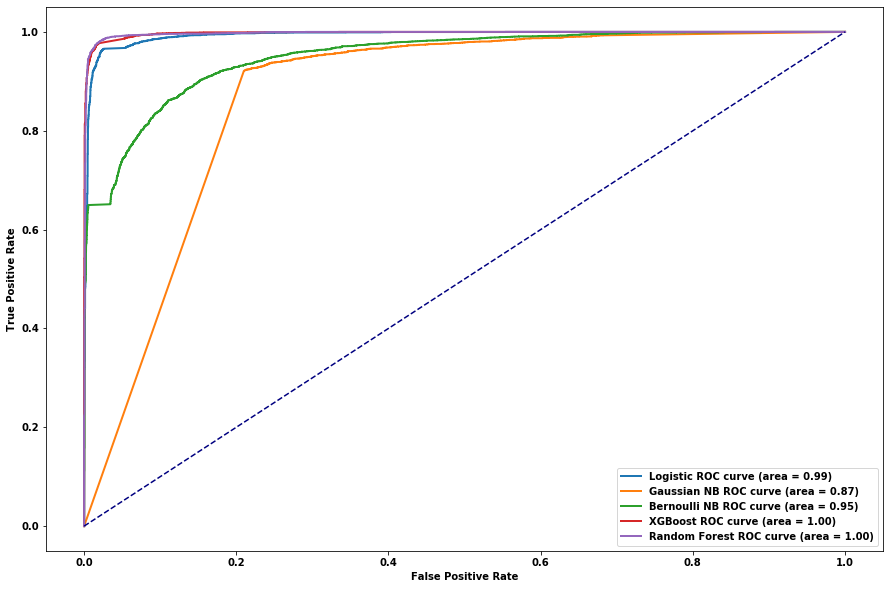

In [308]:
lw =2
plt.figure(figsize = (15,10))
plt.plot(lgr_fpr, lgr_tpr, lw = lw, label='Logistic ROC curve (area = %0.2f)' % lgr_auc)
plt.plot(gnb_fpr, gnb_tpr, lw = lw, label='Gaussian NB ROC curve (area = %0.2f)' % gnb_auc)
plt.plot(bnb_fpr, bnb_tpr,  lw = lw, label='Bernoulli NB ROC curve (area = %0.2f)' % bnb_auc)
plt.plot(xgbc_fpr, xgbc_tpr, lw=lw,  label='XGBoost ROC curve (area = %0.2f)' % xgbc_auc)
plt.plot(rfc_fpr, rfc_tpr,  lw = lw, label='Random Forest ROC curve (area = %0.2f)' % rfc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()